In [1]:
import numpy as np
import pandas as pd

# Getting the Data #

In [2]:
#Load student maths course information
dfmath = pd.read_csv("student/student-mat.csv")

In [3]:
dfmath.shape

(395, 1)

In [4]:
dfmath.head()

,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."


In [5]:
dfmath.columns

Index(['school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3'], dtype='object')

In [6]:
def create_dataframe(df):
    """Creates multicolumn dataframe from single column dataframe"""
    
    cols = pd.array(df.columns)[0].split(";")
    df2 = pd.DataFrame(columns=cols)
    num_rows = df.shape[0]
    
    #Add values to the new dataframe
    for row in range(num_rows):
        df2 = pd.concat([df2, pd.DataFrame([df.iloc[row, 0].split(";")],columns=cols)], 
                              ignore_index=True)
    return df2

In [7]:
#Create math course dataframe with proper columns
student_mathdf = create_dataframe(dfmath)
student_mathdf.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,"""F""",18,"""U""","""GT3""","""A""",4,4,"""at_home""","""teacher""",...,4,3,4,1,1,3,6,"""5""","""6""",6
1,GP,"""F""",17,"""U""","""GT3""","""T""",1,1,"""at_home""","""other""",...,5,3,3,1,1,3,4,"""5""","""5""",6
2,GP,"""F""",15,"""U""","""LE3""","""T""",1,1,"""at_home""","""other""",...,4,3,2,2,3,3,10,"""7""","""8""",10
3,GP,"""F""",15,"""U""","""GT3""","""T""",4,2,"""health""","""services""",...,3,2,2,1,1,5,2,"""15""","""14""",15
4,GP,"""F""",16,"""U""","""GT3""","""T""",3,3,"""other""","""other""",...,4,3,2,1,2,5,4,"""6""","""10""",10


In [8]:
student_mathdf.shape

(395, 33)

In [9]:
student_mathdf.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [10]:
student_mathdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    object
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    object
 7   Fedu        395 non-null    object
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    object
 13  studytime   395 non-null    object
 14  failures    395 non-null    object
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [11]:
student_mathdf.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [12]:
def strip_qoutes(df):
    """Removes qoutes from the string values"""
    
    for col in df.columns:
        if df[col].dtype == object:
            df[col] = df[col].str.replace('"', "")
    return df

In [13]:
math_df = strip_qoutes(student_mathdf.copy())

In [14]:
def str_to_numeric(df):
    """Converts columns with string data type to float"""
    
    for col in df.columns:
        try:
            df[col] = df[col].astype(np.float32)
        except:
            continue

In [15]:
str_to_numeric(math_df)
math_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4.0,4.0,at_home,teacher,...,4.0,3.0,4.0,1.0,1.0,3.0,6.0,5.0,6.0,6.0
1,GP,F,17.0,U,GT3,T,1.0,1.0,at_home,other,...,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5.0,5.0,6.0
2,GP,F,15.0,U,LE3,T,1.0,1.0,at_home,other,...,4.0,3.0,2.0,2.0,3.0,3.0,10.0,7.0,8.0,10.0
3,GP,F,15.0,U,GT3,T,4.0,2.0,health,services,...,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15.0,14.0,15.0
4,GP,F,16.0,U,GT3,T,3.0,3.0,other,other,...,4.0,3.0,2.0,1.0,2.0,5.0,4.0,6.0,10.0,10.0


In [16]:
math_df.dtypes

school         object
sex            object
age           float32
address        object
famsize        object
Pstatus        object
Medu          float32
Fedu          float32
Mjob           object
Fjob           object
reason         object
guardian       object
traveltime    float32
studytime     float32
failures      float32
schoolsup      object
famsup         object
paid           object
activities     object
nursery        object
higher         object
internet       object
romantic       object
famrel        float32
freetime      float32
goout         float32
Dalc          float32
Walc          float32
health        float32
absences      float32
G1            float32
G2            float32
G3            float32
dtype: object

# Data Exploration #

## Summary Statistics ##

In [17]:
#Display basic data statistic summary
math_class_stats = math_df.describe() 
math_class_stats.transpose()

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


In [18]:
#Number of females and males in Maths class
#F - females
#M - males
math_df["sex"].value_counts()

F    208
M    187
Name: sex, dtype: int64

In [19]:
#Amount of time each student spends studying weekly
#1 - < 2 hours, 
#2 - 2 to 5 hours, 
#3 - 5 to 10 hours, 
#or 4 - >10 hours
math_df["studytime"].value_counts()

2.0    198
1.0    105
3.0     65
4.0     27
Name: studytime, dtype: int64

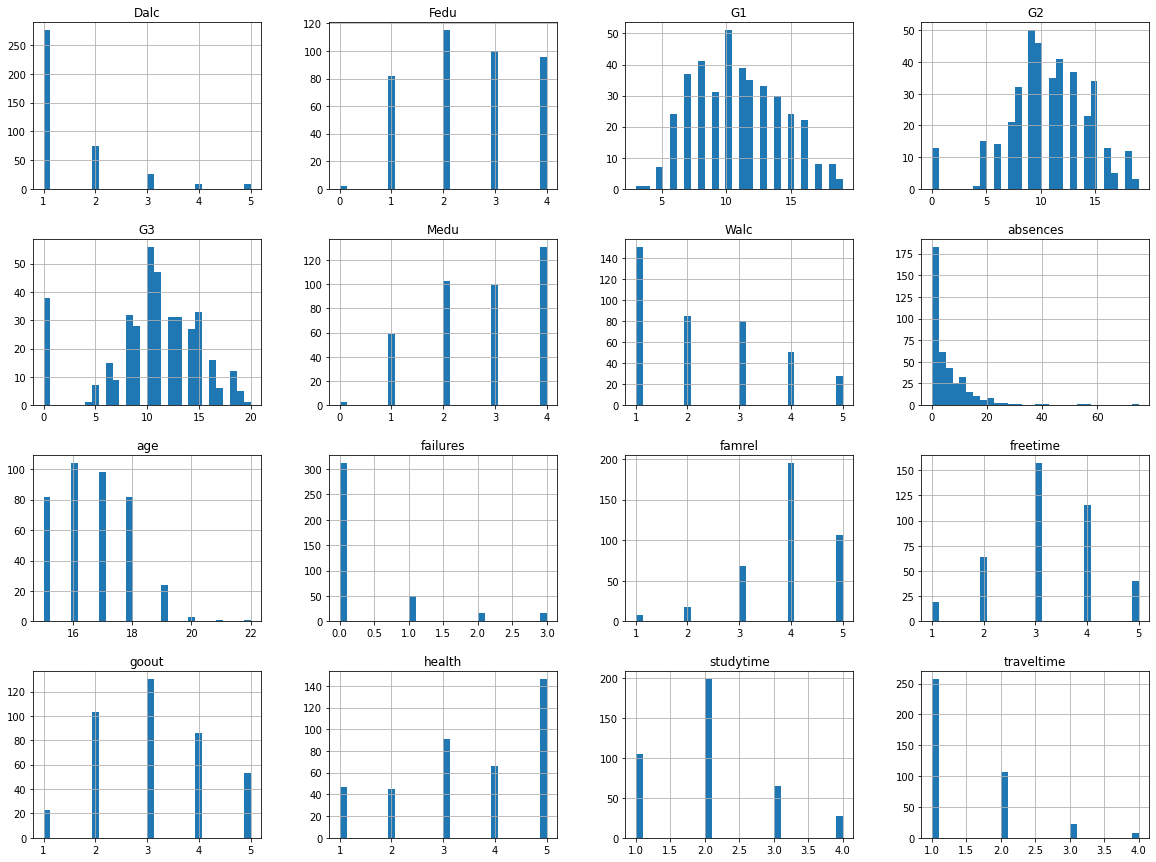

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

#Display the distributions of the numeric feautures
math_df.hist(bins=30, figsize=(20,15))
plt.show()

In [21]:
#Divide the data into representative strata
math_df["grade_cat"] = pd.cut(math_df["G3"],bins=[-0.5, 10.5, 20.5,], labels=[1, 2])

<AxesSubplot:>

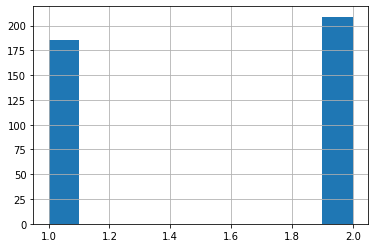

In [22]:
#Display the strata using a histogram
math_df["grade_cat"].hist()

In [23]:
from sklearn.model_selection import StratifiedShuffleSplit

#Split dataset into training and test sets using stratified sampling
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(math_df, math_df["grade_cat"]):
    strat_train_set = math_df.loc[train_index]
    strat_test_set = math_df.loc[test_index]

In [24]:
strat_train_set.shape

(316, 34)

In [25]:
#Stratified sampling proportions of grade category in test set
strat_test_set["grade_cat"].value_counts() / len(strat_test_set)

2    0.531646
1    0.468354
Name: grade_cat, dtype: float64

In [26]:
#Purely random sampling grade category proportions in test set
from sklearn.model_selection import train_test_split

train_set2, test_set2 = train_test_split(math_df, test_size=0.2, random_state=42)
test_set2["grade_cat"].value_counts() /len(test_set2)

2    0.518987
1    0.481013
Name: grade_cat, dtype: float64

In [27]:
#Grade category proprtions in full dataset
math_df["grade_cat"].value_counts() / len(math_df)

2    0.529114
1    0.470886
Name: grade_cat, dtype: float64

In [28]:
#Remove grade category from dataset
for set_ in (strat_train_set, strat_test_set):
    set_.drop("grade_cat", axis=1, inplace=True)

## Data Visualization ##

In [29]:
import seaborn as sns
sns.set()

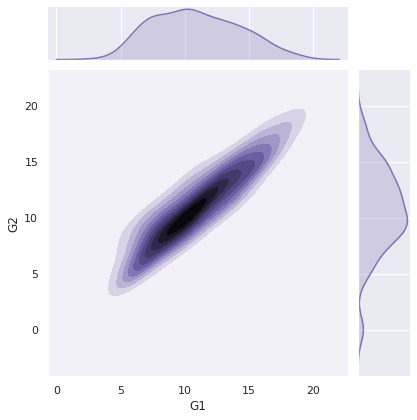

In [30]:
#Plot the joint distributions of first period grade "G1" and second period "G2"
sns.jointplot(math_df["G1"],math_df["G2"], kind="kde", color="m")

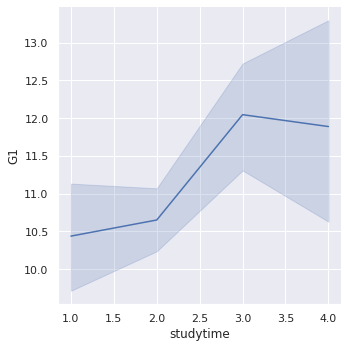

In [31]:
#Visualize relationship between studytime and first period grade "G1"
sns.relplot(x = "studytime", y = "G1", data = math_df, kind = "line")

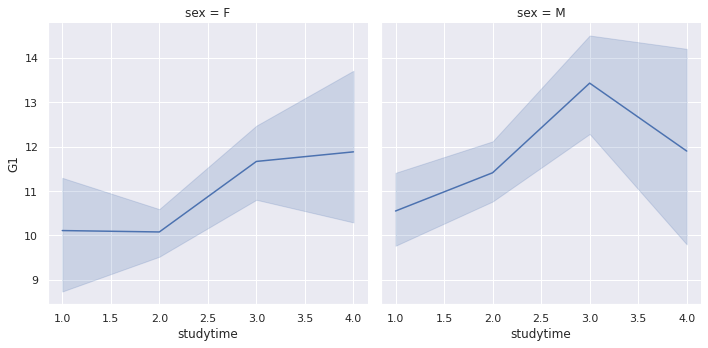

In [32]:
#Visualize relationship between studytime and first period grade "G1" based on gender
sns.relplot(x = "studytime", y = "G1",col = "sex", data = math_df, kind = "line")

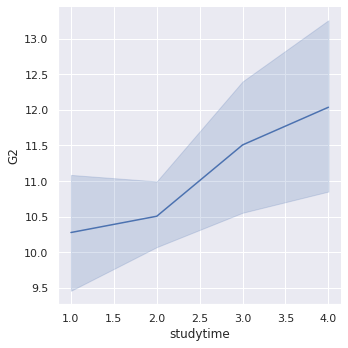

In [33]:
#Visualize relationship between studytime and second period grade "G2"
sns.relplot(x = "studytime", y = "G2", data = math_df, kind = "line")

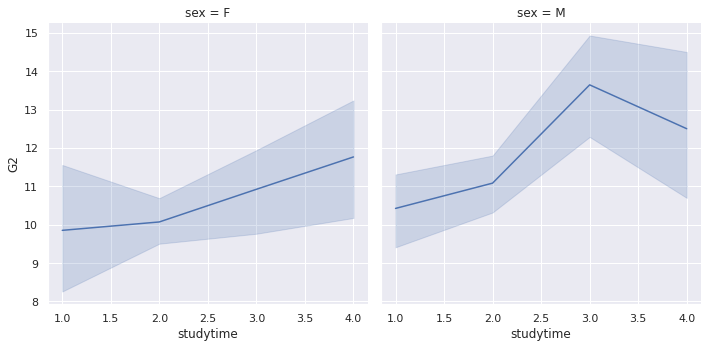

In [34]:
#Visualize relationship between studytime and second period grade "G2" based on gender
sns.relplot(x = "studytime", y = "G2",col = "sex", data = math_df, kind = "line")

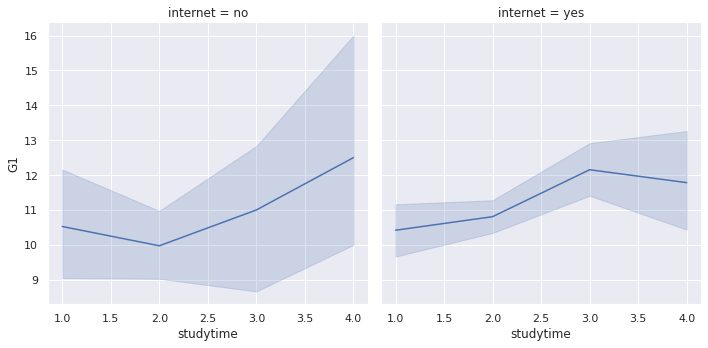

In [35]:
sns.relplot(x = "studytime", y = "G1", col = "internet", data = math_df, kind = "line")

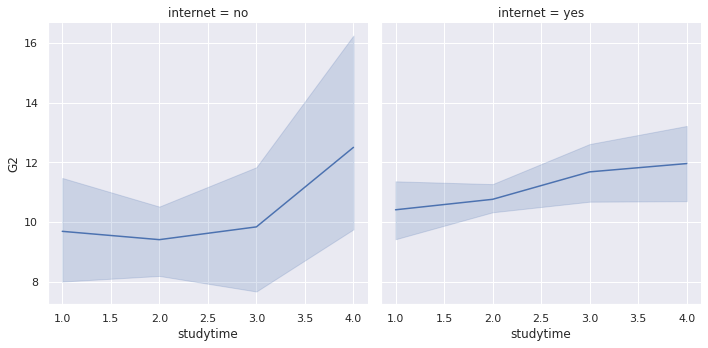

In [36]:
sns.relplot(x = "studytime", y = "G2", col = "internet", data = math_df, kind = "line")

 ## Correlations  

In [37]:
#Correlations between final grade and other features
corr_matrix = math_df.corr()
corr_matrix["G3"].sort_values(ascending=False)

G3            1.000000
G2            0.904868
G1            0.801468
Medu          0.217147
Fedu          0.152457
studytime     0.097820
famrel        0.051363
absences      0.034247
freetime      0.011307
Walc         -0.051939
Dalc         -0.054660
health       -0.061335
traveltime   -0.117142
goout        -0.132791
age          -0.161579
failures     -0.360415
Name: G3, dtype: float64

In [39]:
corr_matrix.style.background_gradient(cmap='coolwarm')

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


array([[<AxesSubplot:xlabel='G3', ylabel='G3'>,
        <AxesSubplot:xlabel='G1', ylabel='G3'>,
        <AxesSubplot:xlabel='G2', ylabel='G3'>,
        <AxesSubplot:xlabel='Medu', ylabel='G3'>,
        <AxesSubplot:xlabel='Fedu', ylabel='G3'>,
        <AxesSubplot:xlabel='failures', ylabel='G3'>],
       [<AxesSubplot:xlabel='G3', ylabel='G1'>,
        <AxesSubplot:xlabel='G1', ylabel='G1'>,
        <AxesSubplot:xlabel='G2', ylabel='G1'>,
        <AxesSubplot:xlabel='Medu', ylabel='G1'>,
        <AxesSubplot:xlabel='Fedu', ylabel='G1'>,
        <AxesSubplot:xlabel='failures', ylabel='G1'>],
       [<AxesSubplot:xlabel='G3', ylabel='G2'>,
        <AxesSubplot:xlabel='G1', ylabel='G2'>,
        <AxesSubplot:xlabel='G2', ylabel='G2'>,
        <AxesSubplot:xlabel='Medu', ylabel='G2'>,
        <AxesSubplot:xlabel='Fedu', ylabel='G2'>,
        <AxesSubplot:xlabel='failures', ylabel='G2'>],
       [<AxesSubplot:xlabel='G3', ylabel='Medu'>,
        <AxesSubplot:xlabel='G1', ylabel='Medu'>,
   

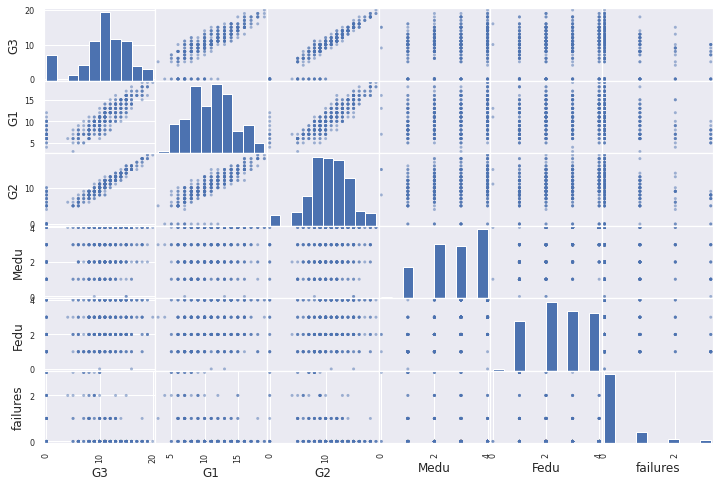

In [40]:
#Plot the correlation matrix
from pandas.plotting import scatter_matrix

attributes = ["G3", "G1", "G2","Medu", "Fedu", "failures"]
scatter_matrix(math_df[attributes], figsize=(12, 8))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='G1', ylabel='G3'>

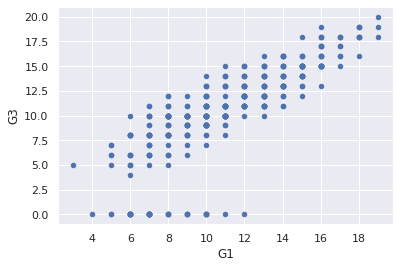

In [41]:
#Verify correlation between "G1" and "G3"
math_df.plot(kind="scatter", x="G1", y="G3")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='G2', ylabel='G3'>

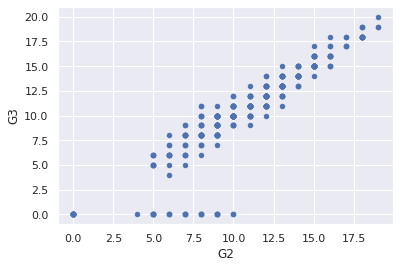

In [42]:
#Verify correlation between "G2" and "G3"
math_df.plot(kind="scatter", x="G2", y="G3")

In [43]:
math_df["mid_grade_average"] = (math_df["G1"] + math_df["G2"]) / len(math_df)
corr_matrix = math_df.corr()
corr_matrix["G3"].sort_values(ascending=False)

G3                   1.000000
G2                   0.904868
mid_grade_average    0.889792
G1                   0.801468
Medu                 0.217147
Fedu                 0.152457
studytime            0.097820
famrel               0.051363
absences             0.034247
freetime             0.011307
Walc                -0.051939
Dalc                -0.054660
health              -0.061335
traveltime          -0.117142
goout               -0.132791
age                 -0.161579
failures            -0.360415
Name: G3, dtype: float64

# Data Preparation

In [44]:
# #Separate predictors and labels in test set
math = strat_train_set.drop("G3", axis=1)
math_labels = strat_train_set["G3"].copy()

In [45]:
#Custom transformer that optionally adds the average of first and second period grades to dataset
from sklearn.base import BaseEstimator, TransformerMixin

first_period_grade_index, second_period_grade_index = 30, 31

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_grade_average = True): 
        self.add_grade_average = add_grade_average
    
    def fit(self, X, y=None):
        return self # nothing else to do
    
    def transform(self, X, y=None):
        if self.add_grade_average:
            X["grade_average"] = (X["G1"] + X["G2"]) / len(X)
            return X
        else:
            return X

In [46]:
#Apply transformations to numeric and categorical columns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_pipeline = Pipeline([('attribs_adder', CombinedAttributesAdder(False)),
                         ('std_scaler', StandardScaler()),])

#Dataset list of category columns
math_cat_list = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob','reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic']

#Numeric columns from dataset
math_num = math.drop(math_cat_list, axis=1)
num_attribs = list(math_num)
# print(math.head())

full_pipeline = ColumnTransformer([("num", num_pipeline, num_attribs),
                         ("cat", OneHotEncoder(), math_cat_list),])

math_data_prepared = full_pipeline.fit_transform(math)

# Models Evaluation

## Linear Regression Model

In [47]:
# Train a Linear Regression model
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(math_data_prepared, math_labels)

LinearRegression()

In [48]:
# Evaluate model on training set
from sklearn.metrics import mean_squared_error

math_predictions = lin_reg.predict(math_data_prepared)
math_mse = mean_squared_error(math_labels, math_predictions)
math_rmse = np.sqrt(math_mse)
math_rmse

1.7969492227886947

In [50]:
# Evaluate performance of Linear Regression model using cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, math_data_prepared, math_labels,
scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)
lin_rmse_scores

array([2.42939208, 1.90970801, 3.1722762 , 1.41319088, 1.71124439,
       1.73972055, 2.62778434, 2.25378331, 1.38262947, 1.92529294])

In [51]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [52]:
# Results of Linear Regression model validation
display_scores(lin_rmse_scores)

Scores: [2.42939208 1.90970801 3.1722762  1.41319088 1.71124439 1.73972055
 2.62778434 2.25378331 1.38262947 1.92529294]
Mean: 2.0565022183891775
Standard deviation: 0.5362418758089426


In [104]:
lin_model_coef = lin_reg.coef_
print("Model slope:", lin_model_coef)
print("Model intercept:", lin_reg.intercept_)

Model slope: [-2.19530572e-01  2.35531505e-01 -1.45386643e-01  7.90463188e-02
 -2.07163198e-02 -1.72756234e-01  3.53053464e-01  1.50159015e-01
 -6.91217147e-02 -2.94466210e-01  2.93990776e-01  7.71389778e-02
  3.98688539e-01  7.09369795e-01  3.38448158e+00  1.00630132e+12
  1.00630132e+12  3.00596666e+11  3.00596666e+11 -5.16049378e+11
 -5.16049378e+11  1.47635820e+10  1.47635820e+10 -2.76473764e+09
 -2.76473764e+09 -1.13050698e+12 -1.13050698e+12 -1.13050698e+12
 -1.13050698e+12 -1.13050698e+12 -8.12346364e+11 -8.12346364e+11
 -8.12346364e+11 -8.12346364e+11 -8.12346364e+11  6.27405995e+11
  6.27405995e+11  6.27405995e+11  6.27405995e+11 -2.74077568e+12
 -2.74077568e+12 -2.74077568e+12  1.29192217e+12  1.29192217e+12
  8.21074431e+11  8.21074431e+11  5.37587826e+08  5.37587827e+08
 -5.86140461e+11 -5.86140461e+11  7.83434152e+10  7.83434152e+10
  8.98399872e+10  8.98399872e+10  3.29126804e+11  3.29126804e+11
  1.19105456e+12  1.19105456e+12]
Model intercept: 37617079874.67912


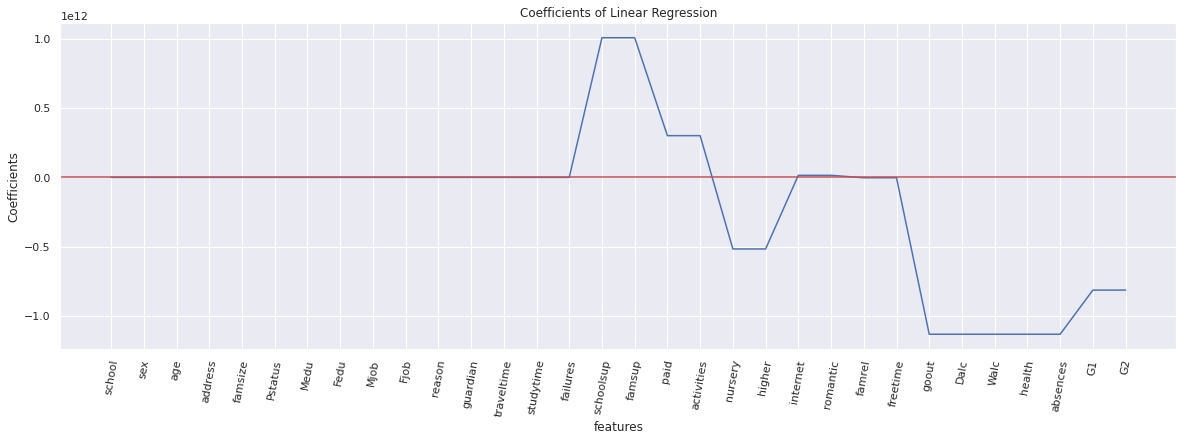

In [107]:
feature_names = math.columns

plt.figure(figsize=(20,6))
plt.plot(range(len(feature_names)), lin_model_coef[:32])
plt.axhline(0, color="r", linestyle="solid")
plt.xticks(range(len(feature_names)), feature_names, rotation=80)
plt.title("Coefficients of Linear Regression")
plt.ylabel("Coefficients")
plt.xlabel("features")
plt.show()

## DecisionTree Regression Model

In [54]:
# Train a DecisionTree Regression model
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(math_data_prepared, math_labels)

DecisionTreeRegressor()

In [55]:
# Evaluate model on training set
math_predictions = tree_reg.predict(math_data_prepared)
math_mse = mean_squared_error(math_labels, math_predictions)
math_rmse = np.sqrt(math_mse)
math_rmse

0.0

In [56]:
# Evaluate performance of DecisionTree Regression model using cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, math_data_prepared, math_labels,
scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [57]:
# Results of DecisionTreeRegressor model validation
display_scores(tree_rmse_scores)

Scores: [2.44310254 1.13192314 2.88314065 2.1286733  2.3251344  1.18585412
 2.85679721 1.79605302 2.2070269  1.84040669]
Mean: 2.079811197226979
Standard deviation: 0.5740439991163903


## RandomForest Regression Model

In [58]:
# Train a RandomForest Regression model
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(math_data_prepared, math_labels)

RandomForestRegressor()

In [59]:
# Evaluate model on training set
math_predictions = forest_reg.predict(math_data_prepared)
math_mse = mean_squared_error(math_labels, math_predictions)
math_rmse = np.sqrt(math_mse)
math_rmse

0.6615260933265587

In [60]:
# Evaluate performance of RandomForest Regression model using cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(forest_reg, math_data_prepared, math_labels,
scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)

In [61]:
# Results of RandomForest Regression model validation
display_scores(forest_rmse_scores)

Scores: [1.9685988  1.2225524  2.36332988 1.65731428 1.69413695 1.40085465
 2.4804253  1.55125651 1.4065664  1.40326233]
Mean: 1.7148297507610255
Standard deviation: 0.40430162369326117


# Fine Tune The Models

## Linear Regression Model

In [62]:
# Find best combination of hyperparameters fro linear regression model
from sklearn.model_selection import GridSearchCV

param_grid = {'fit_intercept': [True, False],
    'normalize': [True, False]}

grid_search_lin = GridSearchCV(LinearRegression(), param_grid, cv=10, scoring='neg_mean_squared_error',
                           return_train_score=True)

In [63]:
grid_search_lin.fit(math_data_prepared, math_labels)

GridSearchCV(cv=10, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [65]:
grid_search_lin.best_params_

{'fit_intercept': True, 'normalize': False}

In [66]:
# Get the best linear model
grid_search_lin.best_estimator_

LinearRegression()

In [67]:
cvres = grid_search_lin.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

2.1487672678665883 {'fit_intercept': True, 'normalize': True}
2.125266271225961 {'fit_intercept': True, 'normalize': False}
2.1257460509084107 {'fit_intercept': False, 'normalize': True}
2.1257460509084107 {'fit_intercept': False, 'normalize': False}


In [123]:
# Coefficeints of best linear regression model
best_model_coeffs = grid_search_lin.best_estimator_.coef_
best_model_coeffs

array([-2.19530572e-01,  2.35531505e-01, -1.45386643e-01,  7.90463188e-02,
       -2.07163198e-02, -1.72756234e-01,  3.53053464e-01,  1.50159015e-01,
       -6.91217147e-02, -2.94466210e-01,  2.93990776e-01,  7.71389778e-02,
        3.98688539e-01,  7.09369795e-01,  3.38448158e+00,  1.00630132e+12,
        1.00630132e+12,  3.00596666e+11,  3.00596666e+11, -5.16049378e+11,
       -5.16049378e+11,  1.47635820e+10,  1.47635820e+10, -2.76473764e+09,
       -2.76473764e+09, -1.13050698e+12, -1.13050698e+12, -1.13050698e+12,
       -1.13050698e+12, -1.13050698e+12, -8.12346364e+11, -8.12346364e+11,
       -8.12346364e+11, -8.12346364e+11, -8.12346364e+11,  6.27405995e+11,
        6.27405995e+11,  6.27405995e+11,  6.27405995e+11, -2.74077568e+12,
       -2.74077568e+12, -2.74077568e+12,  1.29192217e+12,  1.29192217e+12,
        8.21074431e+11,  8.21074431e+11,  5.37587826e+08,  5.37587827e+08,
       -5.86140461e+11, -5.86140461e+11,  7.83434152e+10,  7.83434152e+10,
        8.98399872e+10,  

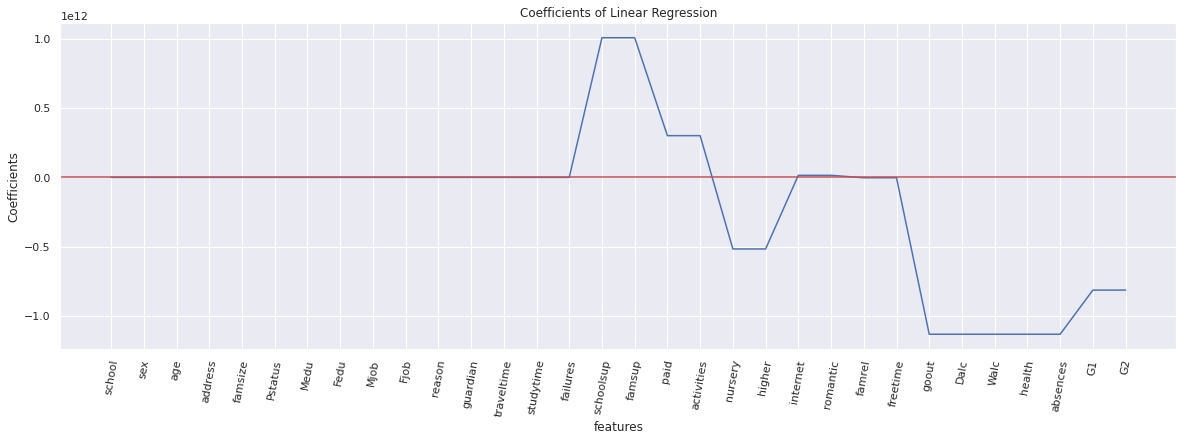

In [124]:
# Plot coefficients of best Linear Rgression Model so far
feature_names = math.columns

plt.figure(figsize=(20,6))
plt.plot(range(len(feature_names)), best_model_coeffs[:32])
plt.axhline(0, color="r", linestyle="solid")
plt.xticks(range(len(feature_names)), feature_names, rotation=80)
plt.title("Coefficients of Linear Regression")
plt.ylabel("Coefficients")
plt.xlabel("features")
plt.show()

In [117]:
# Introduce penalty to error score to reduce the coefficients' values using Lasso Regression
from sklearn.linear_model import Lasso

alpha_values = {"alpha": [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}
lasso = GridSearchCV(Lasso(), alpha_values, scoring="neg_mean_squared_error", cv=10)

best_lin_model = lasso.fit(math_data_prepared, math_labels)
print("Best value of alpha: ", best_lin_model.best_params_) 
print("Best score: ", best_lin_model.best_score_)

Best value of alpha:  {'alpha': 0.08}
Best score:  -3.9156629638629985


In [126]:
best_lasso_model = lasso.best_estimator_
best_lasso_model

Lasso(alpha=0.08)

In [127]:
scores = cross_val_score(lasso, math_data_prepared, math_labels,
scoring="neg_mean_squared_error", cv=10)
lasso_scores = np.sqrt(-scores)
lasso_scores

array([2.03578187, 1.35416897, 3.15471357, 1.14157912, 1.66146418,
       1.74558149, 2.62276262, 2.21540458, 0.98110796, 1.83467588])

In [128]:
display_scores(lasso_scores)

Scores: [2.03578187 1.35416897 3.15471357 1.14157912 1.66146418 1.74558149
 2.62276262 2.21540458 0.98110796 1.83467588]
Mean: 1.8747240245759378
Standard deviation: 0.633303083476464


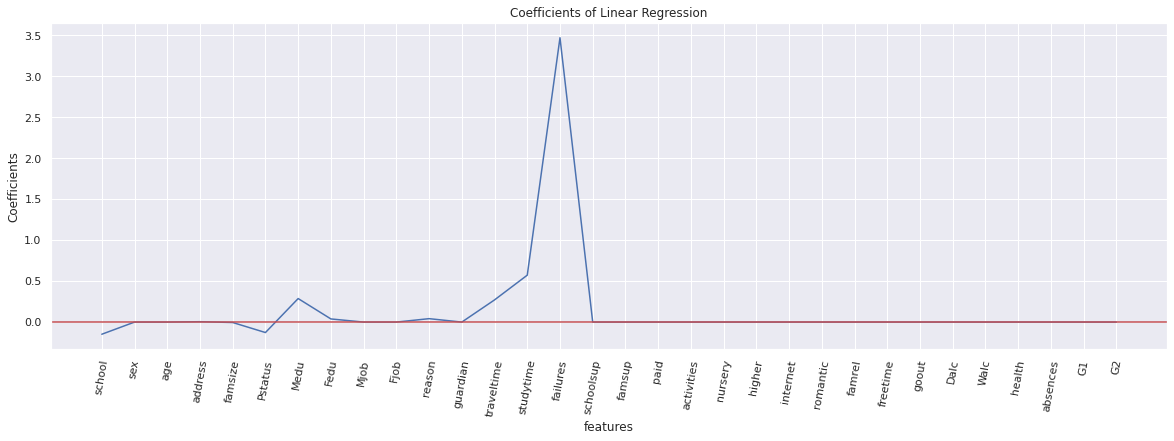

In [121]:
# Plot the coefficients of the best Lasso Regression Model
best_lasso_model.fit(math_data_prepared, math_labels)

feature_names = math.columns

plt.figure(figsize=(20,6))
plt.plot(range(len(feature_names)), best_lasso_model.coef_[:32])
plt.axhline(0, color="r", linestyle="solid")
plt.xticks(range(len(feature_names)), feature_names, rotation=80)
plt.title("Coefficients of Linear Regression")
plt.ylabel("Coefficients")
plt.xlabel("features")
plt.show()

## RandomForest Regression Model

In [213]:
# Find best combination of hyperparameters random forest regression model

param_grid = [{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
              {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(math_data_prepared, math_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [214]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [215]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [216]:
# Display evaluation scores for Random Forest Regression
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

4.000644100478683 {'max_features': 2, 'n_estimators': 3}
3.5994000271650215 {'max_features': 2, 'n_estimators': 10}
3.400948925443372 {'max_features': 2, 'n_estimators': 30}
3.6324901332145743 {'max_features': 4, 'n_estimators': 3}
3.2190548883014887 {'max_features': 4, 'n_estimators': 10}
2.9561784573040533 {'max_features': 4, 'n_estimators': 30}
3.474763355854426 {'max_features': 6, 'n_estimators': 3}
2.7553020676737034 {'max_features': 6, 'n_estimators': 10}
2.5315800702558082 {'max_features': 6, 'n_estimators': 30}
3.0658583518914297 {'max_features': 8, 'n_estimators': 3}
2.625553985382653 {'max_features': 8, 'n_estimators': 10}
2.3674990501889335 {'max_features': 8, 'n_estimators': 30}
3.5808176846923234 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
3.294327339389275 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
3.8700158536149485 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
3.0928979706971997 {'bootstrap': False, 'max_features': 3, 'n_esti

In [220]:
#Display imoprtance scores next to attribute names for Random Forest Regression Model
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])

attributes = num_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(1006301315992.9138, 'MS'),
 (1006301315992.2515, 'GP'),
 (3.3844815820625684, 'G2'),
 (0.7093697945683226, 'G1'),
 (0.3986885385287591, 'absences'),
 (0.3530534643705851, 'famrel'),
 (0.2939907760761977, 'Walc'),
 (0.23553150491943187, 'Medu'),
 (0.15015901460902892, 'freetime'),
 (0.07904631882924806, 'traveltime'),
 (0.07713897781288526, 'health'),
 (-0.020716319794634952, 'studytime'),
 (-0.0691217147080676, 'goout'),
 (-0.14538664276372093, 'Fedu'),
 (-0.17275623419131025, 'failures'),
 (-0.2195305716372855, 'age'),
 (-0.29446620967263115, 'Dalc')]

# Evaluate the Final Model On Test Set